# Assignment 4

In [1]:
import pandas as pd
from pandas import set_option
from scipy import stats
import numpy as np
from ast import literal_eval
import os
from sklearn.preprocessing import MinMaxScaler

In [2]:
import warnings
warnings.filterwarnings('ignore')
set_option('precision',3)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [3]:
f = pd.read_csv("df_dropv1.csv")
f=f.dropna(axis=0)
f['budget'] = f.budget.astype(float)
f.to_csv('new_df.csv')

In [4]:
df = pd.read_csv("new_df.csv")
credits = pd.read_csv(os.path.join(os.getcwd(),'movies')+"\\credits.csv")

In [5]:
credits['crew'] = credits['crew'].apply(literal_eval)

In [6]:
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.NaN

In [7]:
features = ['budget','genres','runtime','popularity','vote_average','revenue']

In [8]:
credits['director'] = credits['crew'].apply(get_director)

In [9]:
df_ = df[features]
df_

,budget,genres,runtime,popularity,vote_average,revenue
0,30000000.00,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",81.00,21.95,7.70,373554033.00
1,65000000.00,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",104.00,17.02,6.90,262797249.00
2,0.00,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",101.00,11.71,6.50,0.00
3,16000000.00,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",127.00,3.86,6.10,81452156.00
4,0.00,"[{'id': 35, 'name': 'Comedy'}]",106.00,8.39,5.70,76578911.00
...,...,...,...,...,...,...
45114,0.00,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",104.00,5.68,5.70,0.00
45115,0.00,"[{'id': 18, 'name': 'Drama'}]",360.00,0.18,9.00,0.00
45116,0.00,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",90.00,0.90,3.80,0.00
45117,0.00,[],87.00,0.00,0.00,0.00


In [10]:
def clean_year(x):
    x = x.split('-')
    return int(x[1])

In [11]:
month = df.release_date

In [12]:
out_month = map(clean_year,month)
out_month = list(out_month)

In [13]:
df_['release_month'] = out_month

In [14]:
df_['director'] = credits['director']

In [15]:
df_

,budget,genres,runtime,popularity,vote_average,revenue,release_month,director
0,30000000.00,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",81.00,21.95,7.70,373554033.00,10,John Lasseter
1,65000000.00,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",104.00,17.02,6.90,262797249.00,12,Joe Johnston
2,0.00,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",101.00,11.71,6.50,0.00,12,Howard Deutch
3,16000000.00,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",127.00,3.86,6.10,81452156.00,12,Forest Whitaker
4,0.00,"[{'id': 35, 'name': 'Comedy'}]",106.00,8.39,5.70,76578911.00,2,Charles Shyer
...,...,...,...,...,...,...,...,...
45114,0.00,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",104.00,5.68,5.70,0.00,5,Gérard Oury
45115,0.00,"[{'id': 18, 'name': 'Drama'}]",360.00,0.18,9.00,0.00,11,Oleg Churkin
45116,0.00,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",90.00,0.90,3.80,0.00,8,Olivier Horlait
45117,0.00,[],87.00,0.00,0.00,0.00,10,Galen T. Chu


## cleaned up genres columns + add director column + change release year to release month + cleaned up budget and revenue columns

In [16]:
df_['genres'] = df_['genres'].fillna('[]')
df_['genres'] = df_['genres'].apply(literal_eval)
df_['genres'] = df_['genres'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [17]:
df_

,budget,genres,runtime,popularity,vote_average,revenue,release_month,director
0,30000000.00,"[Animation, Comedy, Family]",81.00,21.95,7.70,373554033.00,10,John Lasseter
1,65000000.00,"[Adventure, Fantasy, Family]",104.00,17.02,6.90,262797249.00,12,Joe Johnston
2,0.00,"[Romance, Comedy]",101.00,11.71,6.50,0.00,12,Howard Deutch
3,16000000.00,"[Comedy, Drama, Romance]",127.00,3.86,6.10,81452156.00,12,Forest Whitaker
4,0.00,[Comedy],106.00,8.39,5.70,76578911.00,2,Charles Shyer
...,...,...,...,...,...,...,...,...
45114,0.00,"[Drama, Action, Romance]",104.00,5.68,5.70,0.00,5,Gérard Oury
45115,0.00,[Drama],360.00,0.18,9.00,0.00,11,Oleg Churkin
45116,0.00,"[Action, Drama, Thriller]",90.00,0.90,3.80,0.00,8,Olivier Horlait
45117,0.00,[],87.00,0.00,0.00,0.00,10,Galen T. Chu


In [18]:
df_['budget'] = df['budget'].map(lambda x : x if x != 0 else None)
df_['revenue'] = df['revenue'].map(lambda x : x if x != 0 else None)

# drop zeroes in budget + revenue

In [19]:
df_dropped = df_.dropna()

In [20]:
df_dropped = df_dropped.reset_index(drop=True)

In [21]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5313 entries, 0 to 5312
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   budget         5313 non-null   float64
 1   genres         5313 non-null   object 
 2   runtime        5313 non-null   float64
 3   popularity     5313 non-null   float64
 4   vote_average   5313 non-null   float64
 5   revenue        5313 non-null   float64
 6   release_month  5313 non-null   int64  
 7   director       5313 non-null   object 
dtypes: float64(5), int64(1), object(2)
memory usage: 332.2+ KB


In [22]:
df_dropped

,budget,genres,runtime,popularity,vote_average,revenue,release_month,director
0,30000000.00,"[Animation, Comedy, Family]",81.00,21.95,7.70,373554033.00,10,John Lasseter
1,65000000.00,"[Adventure, Fantasy, Family]",104.00,17.02,6.90,262797249.00,12,Joe Johnston
2,16000000.00,"[Comedy, Drama, Romance]",127.00,3.86,6.10,81452156.00,12,Forest Whitaker
3,60000000.00,"[Action, Crime, Drama, Thriller]",170.00,17.92,7.70,187436818.00,12,Michael Mann
4,35000000.00,"[Action, Adventure, Thriller]",106.00,5.23,5.50,64350171.00,12,Peter Hyams
...,...,...,...,...,...,...,...,...
5308,50000000.00,"[Comedy, Family, Animation]",86.00,33.69,5.80,66913939.00,7,Alex Merkin
5309,11000000.00,"[Action, Crime, Mystery, Thriller]",111.00,40.80,7.40,184770205.00,8,"Arthur Rankin, Jr."
5310,12000000.00,"[Action, Comedy, Drama]",185.00,1.32,6.90,19000000.00,6,Marc Gracie
5311,750000.00,"[Crime, Comedy]",0.00,0.20,6.00,3.00,6,Udi Aloni


In [23]:
cols = df_dropped.columns.tolist()
cols = ['budget',
 'genres',
 'runtime',
 'popularity',
 'vote_average',
 'release_month',
 'director','revenue']
df_dropped = df_dropped[cols]

In [24]:
df_dropped

,budget,genres,runtime,popularity,vote_average,release_month,director,revenue
0,30000000.00,"[Animation, Comedy, Family]",81.00,21.95,7.70,10,John Lasseter,373554033.00
1,65000000.00,"[Adventure, Fantasy, Family]",104.00,17.02,6.90,12,Joe Johnston,262797249.00
2,16000000.00,"[Comedy, Drama, Romance]",127.00,3.86,6.10,12,Forest Whitaker,81452156.00
3,60000000.00,"[Action, Crime, Drama, Thriller]",170.00,17.92,7.70,12,Michael Mann,187436818.00
4,35000000.00,"[Action, Adventure, Thriller]",106.00,5.23,5.50,12,Peter Hyams,64350171.00
...,...,...,...,...,...,...,...,...
5308,50000000.00,"[Comedy, Family, Animation]",86.00,33.69,5.80,7,Alex Merkin,66913939.00
5309,11000000.00,"[Action, Crime, Mystery, Thriller]",111.00,40.80,7.40,8,"Arthur Rankin, Jr.",184770205.00
5310,12000000.00,"[Action, Comedy, Drama]",185.00,1.32,6.90,6,Marc Gracie,19000000.00
5311,750000.00,"[Crime, Comedy]",0.00,0.20,6.00,6,Udi Aloni,3.00


In [25]:
#IQR
Q1 = df_dropped.quantile(0.25)
Q3 = df_dropped.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

budget          34800000.00
runtime               25.00
popularity             6.25
vote_average           1.20
release_month          6.00
revenue         92334929.00
dtype: float64


In [26]:
df_dropped_outlier_IQR = df_dropped[~((df_dropped<(Q1 - 1.5 * IQR)) | (df_dropped > (Q3 + 1.5 * IQR))).any(axis=1)]

In [27]:
df_dropped_outlier_IQR

,budget,genres,runtime,popularity,vote_average,release_month,director,revenue
2,16000000.00,"[Comedy, Drama, Romance]",127.00,3.86,6.10,12,Forest Whitaker,81452156.00
4,35000000.00,"[Action, Adventure, Thriller]",106.00,5.23,5.50,12,Peter Hyams,64350171.00
6,62000000.00,"[Comedy, Drama, Romance]",106.00,6.32,6.50,11,Rob Reiner,107879496.00
10,16500000.00,"[Drama, Romance]",136.00,10.67,7.20,12,Ang Lee,135000000.00
11,4000000.00,"[Crime, Comedy]",98.00,9.03,6.50,12,Allison Anders,4300000.00
...,...,...,...,...,...,...,...,...
5301,16000000.00,"[Adventure, Fantasy, Animation, Action, Family]",93.00,6.48,6.00,7,Shinji Aramaki,68411275.00
5303,2000000.00,"[Comedy, Drama]",90.00,1.46,5.30,12,Aleksandr Zakharov,11666088.00
5305,3000000.00,"[Comedy, Romance]",90.00,0.45,4.70,2,Claudio Guerín,1957000.00
5306,2196531.00,"[Comedy, Romance]",107.00,0.95,5.60,12,Kentaro Hagiwara,2411594.00


<AxesSubplot:>

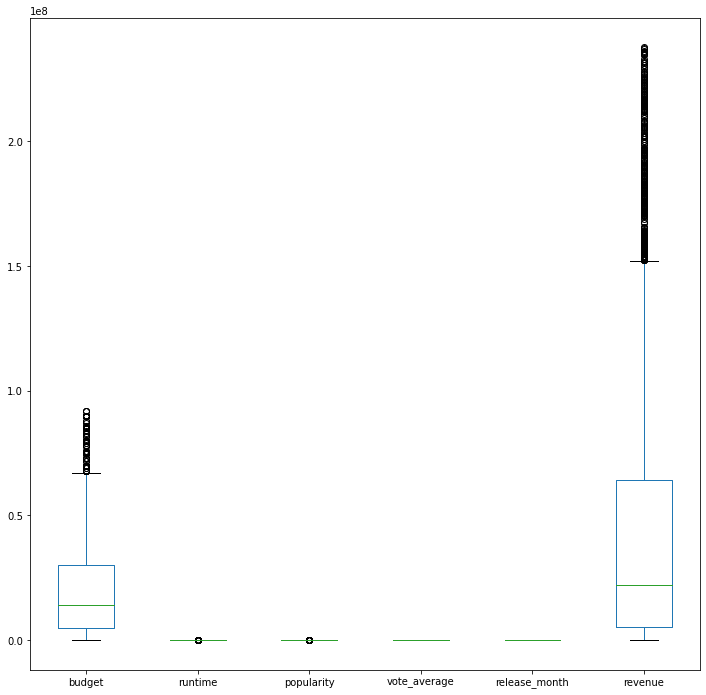

In [28]:
df_dropped_outlier_IQR.plot(df_dropped_outlier_IQR.index.name,cols,kind='box',figsize=(12,12))

In [29]:
df_dropped_outlier_IQR.describe()

,budget,runtime,popularity,vote_average,release_month,revenue
count,4403.00,4403.00,4403.00,4403.00,4403.00,4403.00
mean,20729253.25,106.77,7.98,6.26,6.86,44439328.80
std,20701779.14,16.59,4.16,0.83,3.41,53457222.60
min,1.00,59.00,0.00,3.90,1.00,1.00
25%,5000000.00,95.00,5.23,5.70,4.00,5490125.00
50%,14000000.00,104.00,7.88,6.30,7.00,22000000.00
75%,30000000.00,117.00,10.79,6.90,10.00,64149547.50
max,92000000.00,157.00,21.04,8.70,12.00,237681299.00


In [30]:
col = ['budget','runtime','popularity','vote_average','revenue','release_month']

In [31]:
df_normalize_min_max = df_dropped_outlier_IQR.copy()

In [32]:
scaler = MinMaxScaler()
def normalize(col):
    my_col = np.array(df_normalize_min_max[col]).reshape(-1,1)
    scaler.fit(my_col)
    return scaler.transform(my_col)

In [33]:
for c in col:
    df_normalize_min_max[c] = normalize(c)

In [34]:
df_normalize_min_max

,budget,genres,runtime,popularity,vote_average,release_month,director,revenue
2,0.17,"[Comedy, Drama, Romance]",0.69,0.18,0.46,1.00,Forest Whitaker,0.34
4,0.38,"[Action, Adventure, Thriller]",0.48,0.25,0.33,1.00,Peter Hyams,0.27
6,0.67,"[Comedy, Drama, Romance]",0.48,0.30,0.54,0.91,Rob Reiner,0.45
10,0.18,"[Drama, Romance]",0.79,0.51,0.69,1.00,Ang Lee,0.57
11,0.04,"[Crime, Comedy]",0.40,0.43,0.54,1.00,Allison Anders,0.02
...,...,...,...,...,...,...,...,...
5301,0.17,"[Adventure, Fantasy, Animation, Action, Family]",0.35,0.31,0.44,0.55,Shinji Aramaki,0.29
5303,0.02,"[Comedy, Drama]",0.32,0.07,0.29,1.00,Aleksandr Zakharov,0.05
5305,0.03,"[Comedy, Romance]",0.32,0.02,0.17,0.09,Claudio Guerín,0.01
5306,0.02,"[Comedy, Romance]",0.49,0.05,0.35,1.00,Kentaro Hagiwara,0.01


In [37]:
df_dropped_outlier_IQR=df_dropped_outlier_IQR.drop(['director'],axis=1)
df_without_genres = df_dropped_outlier_IQR.drop(['genres'],axis=1)

In [38]:
df_dropped_outlier_IQR.to_csv("df_IQR.csv",index=False)
df_normalize_min_max.to_csv("df_normalized.csv",index=False)
df_without_genres.to_csv("df_no_genres.csv",index=False)